<a href="https://colab.research.google.com/github/blackpanther26/BreastCancerPrediction/blob/main/23323029_Priyanshu_DAI_101_B3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-World Dataset Analysis: Breast Cancer Dataset
## Objective
To analyze the Breast Cancer dataset and build a classification model to predict whether a tumor is benign or malignant based on its features.

## Dataset
The Breast Cancer dataset is obtained from Kaggle: [Breast Cancer Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Basic Statistical Summary
Below is the statistical summary of the dataset, which includes key metrics such as:
- **Count**: Number of non-missing values.
- **Mean**: Average value of the feature.
- **Standard Deviation (std)**: Spread of the data.
- **Minimum and Maximum**: Range of values.
- **25th, 50th, 75th percentiles**: Distribution of the data.

In [5]:
# Basic statistical summary
print("Basic Statistical Summary:")
stat_summary = df.describe()
print(stat_summary)

Basic Statistical Summary:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01

In [6]:
stat_summary.style.set_caption("Statistical Summary of the Dataset").background_gradient(cmap="coolwarm")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.000000
mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,nan
std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,nan
min,8670.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,nan
25%,869218.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,nan
50%,906024.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,nan
75%,8813129.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,nan
max,911320502.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,nan


In [7]:
# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Summary statistics including percentiles
print(df.describe(include='all'))

# Explore unique values in categorical columns (if any)
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nUnique values in '{col}':\n{df[col].value_counts()}")

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Data Cleaning
Upon analyzing the dataset, it was observed that there are no missing values or inconsistencies. The dataset is already clean and does not require additional preprocessing steps for handling missing or erroneous data. Below is the summary of missing values in the dataset:

- Total missing values: **0**
- No duplicates or invalid entries were found.

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [14]:
# Create the mapping dictionary
mapping = {'M': 1, 'B': 0}

# Use the map function to apply the mapping
df['diagnosis'] = df['diagnosis'].map(mapping)

print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

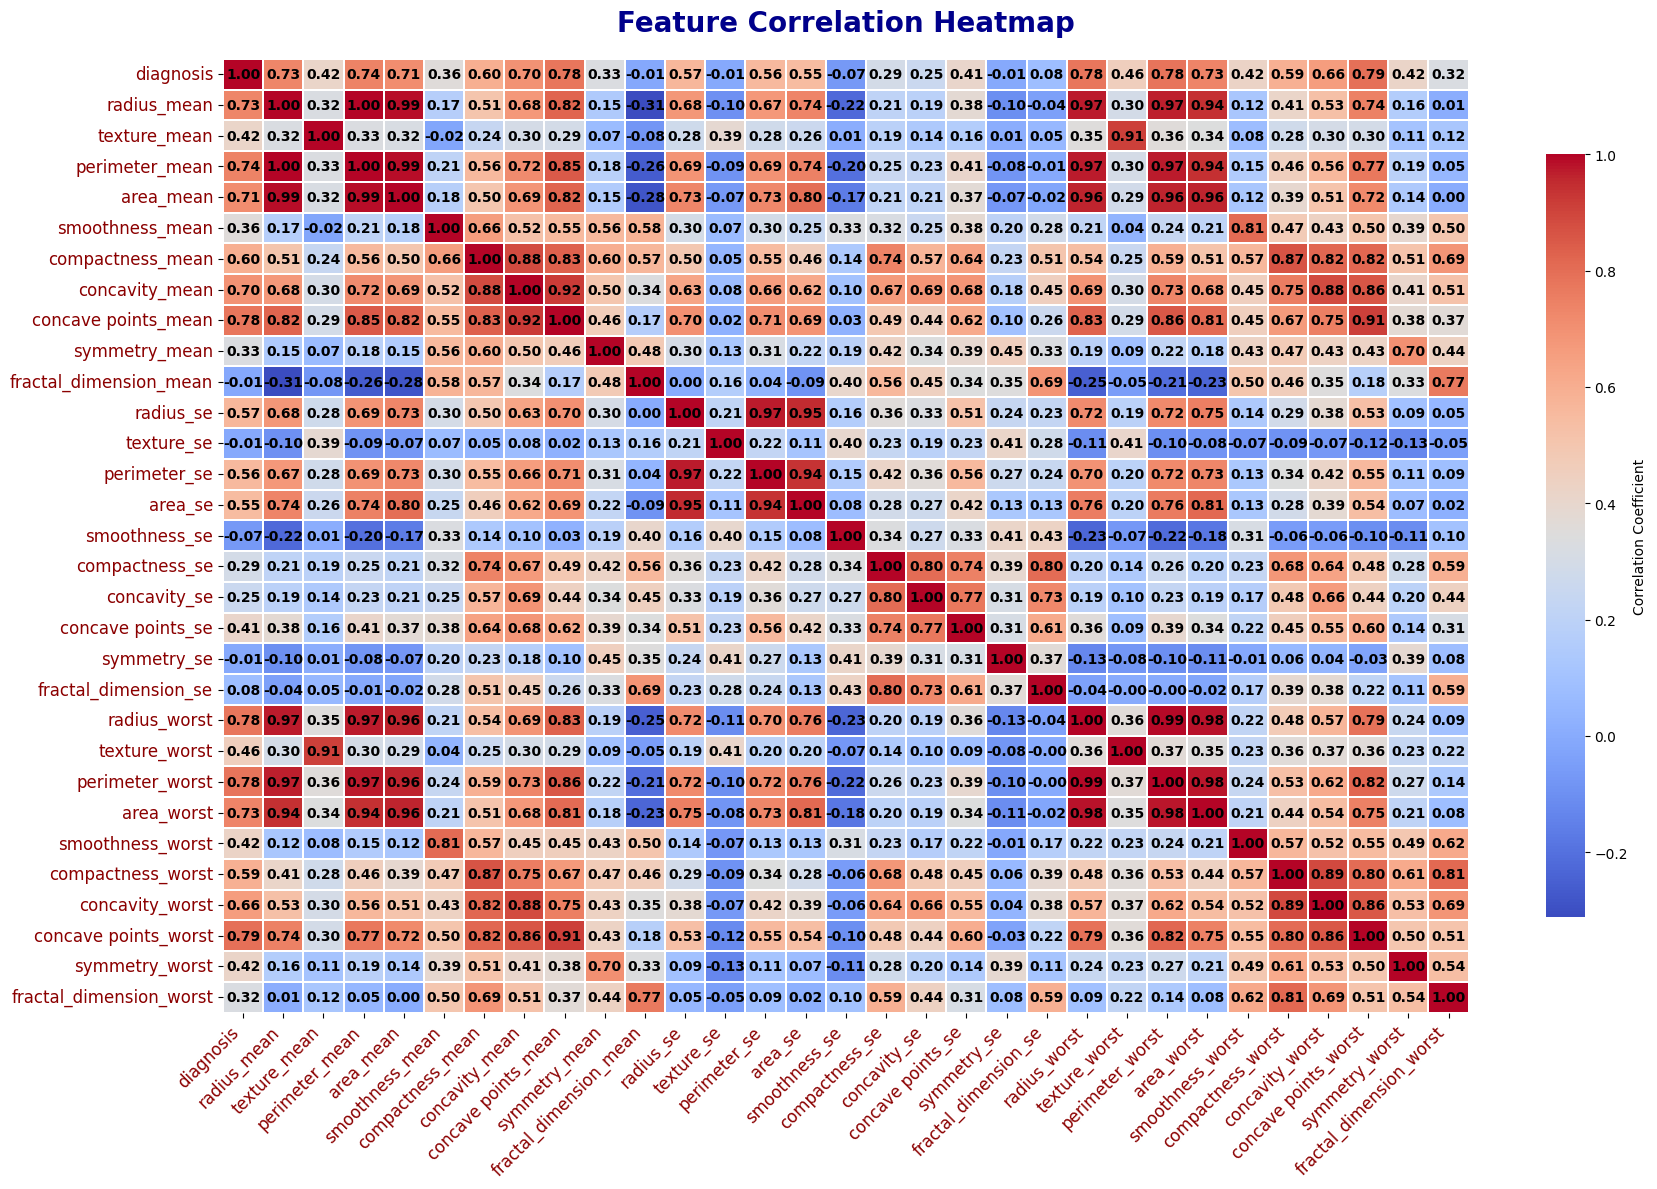

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # Gradient color palette
    annot_kws={"size": 10, "weight": "bold", "color": "black"},  # Styling annotations
    cbar_kws={"shrink": 0.8, "aspect": 20, "label": "Correlation Coefficient"},  # Customizing color bar
    linewidths=0.3,  # Thin gridlines for clarity
    linecolor="white"  # Gridline color
)

# Title and labels
plt.title("Feature Correlation Heatmap", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right", color="darkred")
plt.yticks(fontsize=12, rotation=0, color="darkred")
plt.tight_layout()
plt.show()

<ipython-input-18-b9b34bd84a0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


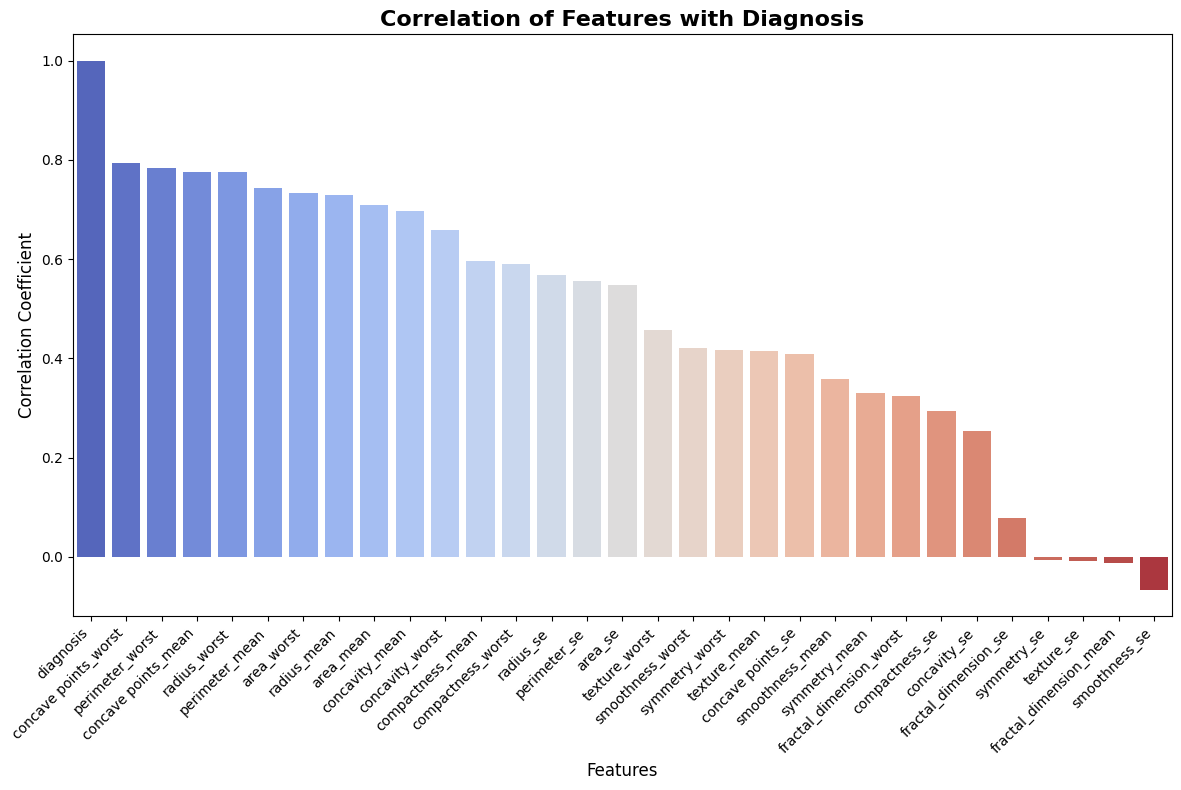

In [18]:
# Bar plot of correlations
diagnosis_corr = correlation_matrix["diagnosis"].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=diagnosis_corr.index,
    y=diagnosis_corr.values,
    palette="coolwarm"  # Gradient color palette
)
plt.title("Correlation of Features with Diagnosis", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# Display top 5 positively and negatively correlated features
print("Top 5 positively correlated features:\n", diagnosis_corr.head(5))
print("\nTop 5 negatively correlated features:\n", diagnosis_corr.tail(5))

Top 5 positively correlated features:
 diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
Name: diagnosis, dtype: float64

Top 5 negatively correlated features:
 fractal_dimension_se      0.077972
symmetry_se              -0.006522
texture_se               -0.008303
fractal_dimension_mean   -0.012838
smoothness_se            -0.067016
Name: diagnosis, dtype: float64


## Observations: Top Positively Correlated Features with Diagnosis

The table below lists the top 5 features that have the highest positive correlation with the target variable `diagnosis`:

| **Feature**            | **Correlation Coefficient** |
|-------------------------|-----------------------------|
| Diagnosis              | 1.000                       |
| Concave Points (Worst) | 0.793566                    |
| Perimeter (Worst)      | 0.782914                    |
| Concave Points (Mean)  | 0.776614                    |
| Radius (Worst)         | 0.776454                    |

### Key Observations:
1. The `diagnosis` feature has a perfect correlation with itself, as expected.
2. Features such as `concave points_worst`, `perimeter_worst`, and `radius_worst` show strong positive correlations with `diagnosis`. These features likely contribute significantly to predicting the target variable.
3. The strong correlations suggest that tumors with higher values for these features are more likely to be malignant.

In [21]:
# Filter features with correlation > 0.5 with 'diagnosis'
selected_features = correlation_matrix["diagnosis"].abs()[correlation_matrix["diagnosis"].abs() > 0.5].index

# Drop 'diagnosis' itself from the selected features (if needed)
selected_features = selected_features.drop("diagnosis")

print("Features with correlation > 0.5 with diagnosis:", selected_features.tolist())

# Subset the dataset with the selected features
X_selected = df[selected_features]
y = df["diagnosis"]

Features with correlation > 0.5 with diagnosis: ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [29]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

Train a Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42,  # For reproducibility
    max_depth=None,  # No limit on tree depth
    min_samples_split=2  # Minimum samples required to split a node
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make predictions**

In [31]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

**Evaluate the Model**

Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



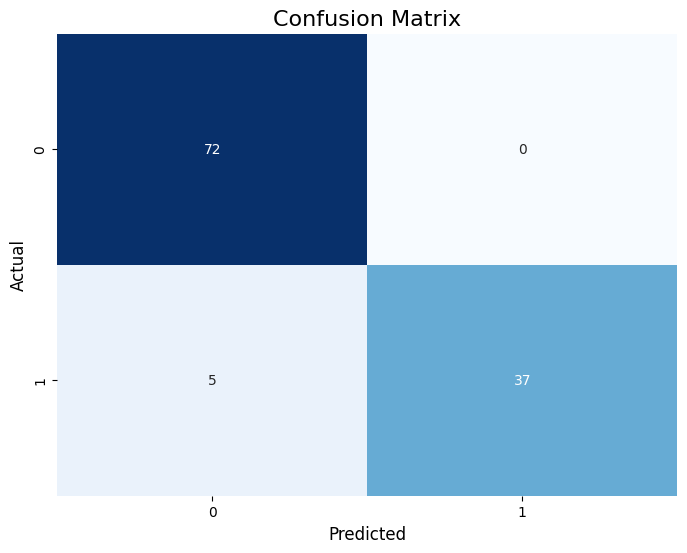

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Testing set evaluation
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

**Perform 5-Fold Cross-Validation**

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.9122807  0.92982456 0.96491228 0.95614035 0.96460177]
Mean Cross-Validation Accuracy: 0.9455519329296692


**Hyperparameter Tuning**

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9516483516483518


In [38]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

SVM Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        72
           1       1.00      0.76      0.86        42

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



Hence , random forest gives better results

##Model Evaluation

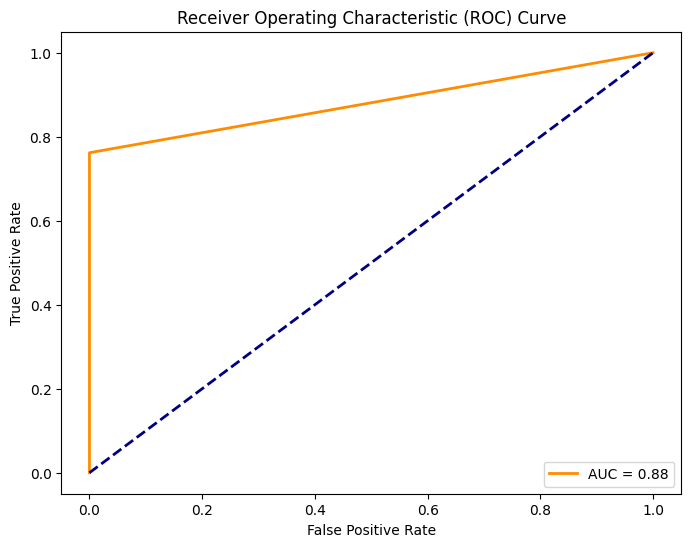

In [39]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### **Model Performance Evaluation**

The **Random Forest** model has been evaluated on both the training and testing datasets. Here are the key observations:

#### **1. Accuracy**:
- **Training Accuracy**: 100%  
  The model has achieved perfect accuracy on the training set, which suggests it has learned the patterns well from the training data.
  
- **Testing Accuracy**: 95.61%  
  The model performs almost equally well on the testing set, with only a slight drop in performance (from 100% on the training set to 95.61% on the testing set). This is an excellent result and indicates that the model generalizes well to unseen data.

#### **2. Classification Report**:
The **classification report** further breaks down the performance of the model into more detailed metrics:
- **Precision**:
  - Class 0 (No Cancer): 0.94
  - Class 1 (Cancer): 1.00  
  Precision is very high for both classes, with a perfect precision score for predicting cancer (Class 1), meaning there are no false positives for this class.
  
- **Recall**:
  - Class 0 (No Cancer): 1.00
  - Class 1 (Cancer): 0.88  
  Recall for Class 1 (cancer) is slightly lower (0.88), indicating that the model misses a few cancer cases, but it still detects a high proportion of cancerous instances. On the other hand, recall for Class 0 (No Cancer) is perfect (1.00), meaning the model does not incorrectly classify any negative samples as positive.

- **F1-Score**:
  - Class 0 (No Cancer): 0.97
  - Class 1 (Cancer): 0.94  
  The F1-scores for both classes are quite good, indicating a strong balance between precision and recall. The F1-score for cancer (Class 1) is a bit lower due to the trade-off between recall and precision.

#### **3. ROC Curve**:
The **ROC Curve** (with an AUC of 0.88) indicates that the model performs well in distinguishing between the two classes. The AUC score suggests that the model is significantly better than random guessing and has a good ability to separate cancerous cases from non-cancerous cases.

#### **4. Conclusion**:
- The model is highly accurate, with a slight drop in performance on the test data, which is typical for many machine learning models.
- Precision and recall are well-balanced, especially for Class 1 (Cancer), but there is some room for improvement in minimizing false negatives.
- The ROC Curve supports these findings, with a high AUC indicating strong discriminatory ability between the classes.

Overall, the **Random Forest** model is performing excellently on this dataset, and the slight drop in recall for cancer cases could be addressed by experimenting with additional tuning or models like **Support Vector Machines** for better balance between precision and recall.